# Startup-Acquisition-Status-Prediction


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
matplotlib.rcParams['figure.figsize'] = (8,5)
pd.set_option('display.max_columns', None)

In [4]:
data_df = pd.read_csv('~/Documents/Internship/Startup-Acquisition-Status-Prediction/data/companies.csv')

# Data Cleaning

### 1. Data Overview

In [5]:
data_df.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [6]:
data_df.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401.0,54.0,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186.0,85.0,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107.0,34.0,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,NaN,NaN,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200.0,74.0,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


> By looking at the info and data types we can clearly see that most of the coluns contains non-unique variety of data which cannot be used in our case.

## 2. Dealing with unnecessary columns
    a. Deleting 'domain','homepage_url', 'twitter_username', 'logo_url', 'logo_width','logo_height',
        'description' ,'overview','tag_list', 'state_code', 'city', 'region','created_by','created_at', 'updated_at' 
         'short_description', columns as this data contains irrelevant and redundant information

In [7]:
# Droping first 7 columns 
data_df.drop(data_df.columns[:8],axis=1,inplace=True)
# Droping other unnecessary columns
data_df.drop(['domain','homepage_url', 'twitter_username', 'logo_url', 'logo_width',
       'logo_height', 'short_description', 'description', 'overview','tag_list', 'state_code', 'city', 'region',
       'created_by','created_at', 'updated_at'],axis=1,inplace=True)

    b. Deleting `closed_at`,`first_investment_at`,`last_investment_at`, `investment_rounds`, `invested_companies` ,`ROI` column 
        as these column contains more than 98% of null values 

In [8]:
print("Percentage of nan values in each columns:")
data_df.isna().mean() * 100

Percentage of nan values in each columns:


category_code          37.326828
status                  0.000000
founded_at             53.586564
closed_at              98.667026
country_code           55.233448
first_investment_at    98.685851
last_investment_at     98.685851
investment_rounds      98.681780
invested_companies     98.681780
first_funding_at       83.970227
last_funding_at        83.970227
funding_rounds         83.868473
funding_total_usd      85.818583
first_milestone_at     53.346426
last_milestone_at      53.346426
milestones             53.346426
relationships          34.029498
lat                    57.338733
lng                    57.338733
ROI                    99.630634
dtype: float64

In [9]:
# Droping some columns having > 98% of null values
data_df.drop(['first_investment_at','last_investment_at','investment_rounds','invested_companies','ROI'],axis=1,inplace=True)

    c. Deleting duplicate values

In [10]:
# Deleting duplicate data keeping the first and removing other duplicacy
data_df.drop(data_df[data_df.duplicated()].index,inplace=True)

## 3.Dealing with missing values and outliers

    a. Droping nan values of 'category_code','status','country_code' & 'founded_at' columns 

In [11]:
# Deleting null values of 'category_code','status','country_code'&'founded_at' columns
data_df.dropna(subset=['category_code','status','country_code','founded_at'],inplace=True)

    b. Removing outliers

In [12]:
data_df.describe()

,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
count,22889.000000,2.046700e+04,35244.000000,48295.000000,61211.000000,61211.000000
mean,1.805758,1.582132e+07,1.415929,4.443607,37.294084,-50.715469
std,1.310805,6.990693e+07,0.738596,13.267906,15.813059,70.778579
min,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.485278
25%,1.000000,5.110380e+05,1.000000,1.000000,34.052234,-112.033479
50%,1.000000,2.725875e+06,1.000000,2.000000,39.739236,-75.898684
75%,2.000000,1.200000e+07,2.000000,4.000000,45.420675,1.750318
max,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.165130


- There is great difference in minimum and maximum vaues of `funding_rounds` , `funding_total_usd` & `relationships` columns as their mean and std is so small compared to max. This is due to outlier in the dataset.

> - funding_rounds

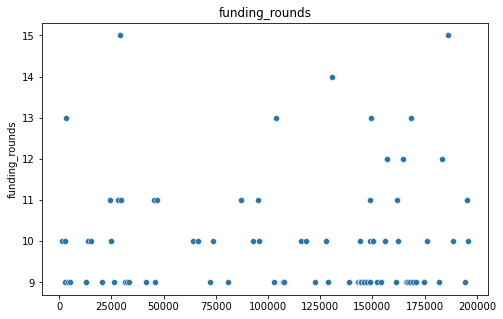

In [13]:
# ploting datas with values of 'funding_rounds'>8 as it will be easy to spot outliers
funding_round = data_df[data_df['funding_rounds']>8]['funding_rounds']
plt.title('funding_rounds')
sns.scatterplot(x = funding_round.index, y =funding_round)
plt.show()

In [14]:
# Removing outliers values 
outlier_funding_round = data_df[data_df['funding_rounds']>13]
data_df.drop(outlier_funding_round.index,inplace=True)

> - funding_total_usd

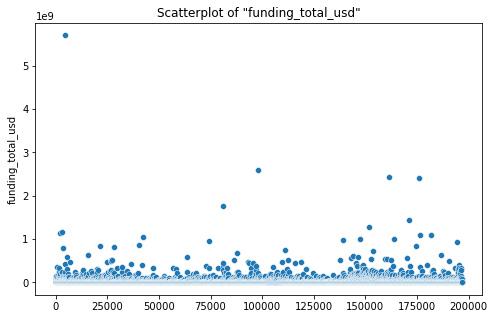

In [15]:
# plotting funding_total_usd column
sns.scatterplot(x=data_df.index,y=data_df.funding_total_usd)
plt.title('Scatterplot of "funding_total_usd"')
plt.show()

We can clearly see outlier data above 2e+9 in the plot. So now removing outliers from both columns as,

In [16]:
funding_usd_outlier = data_df[data_df.funding_total_usd > 2e+09]
data_df.drop(funding_usd_outlier.index,inplace=True)

> - relationships

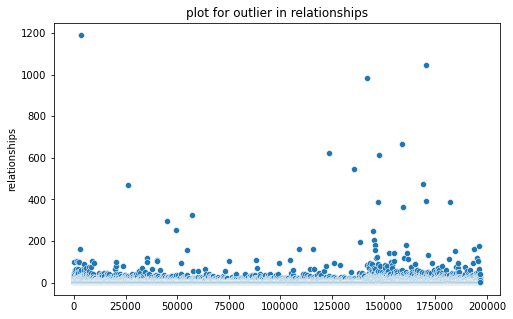

In [17]:
# Scatterplot of relationship column
sns.scatterplot(x=data_df.index,y=data_df.relationships)
plt.title('plot for outlier in relationships')
plt.show()

Here there are three outliers which are above 800 values. So now removing outliers as, 

In [18]:
# Removing outlier from realationships
outlier_relationship = data_df[data_df['relationships'] > 800]
data_df.drop(outlier_relationship.index,axis=0, inplace=True)

> - Checking for inconsistant data

In [19]:
data_df.category_code.unique()

array(['web', 'advertising', 'cleantech', 'games_video', 'mobile',
       'health', 'software', 'analytics', 'network_hosting', 'consulting',
       'finance', 'education', 'medical', 'manufacturing', 'enterprise',
       'other', 'ecommerce', 'public_relations', 'hardware', 'search',
       'news', 'government', 'security', 'biotech', 'photo_video',
       'travel', 'semiconductor', 'social', 'legal', 'transportation',
       'hospitality', 'sports', 'nonprofit', 'fashion', 'messaging',
       'music', 'automotive', 'design', 'real_estate', 'local',
       'nanotech', 'pets'], dtype=object)

In [20]:
data_df.country_code.unique()

array(['USA', 'MAR', 'IND', 'AUS', 'FRA', 'JPN', 'NLD', 'EGY', 'ISR',
       'GBR', 'THA', 'AUT', 'IRL', 'SWE', 'DEU', 'BRA', 'FIN', 'RUS',
       'SGP', 'MEX', 'CHN', 'ESP', 'ISL', 'KOR', 'TUR', 'DNK', 'PAK',
       'HUN', 'CAN', 'POL', 'GRC', 'PRT', 'BLR', 'CSS', 'MKD', 'ARG',
       'CHE', 'UKR', 'ITA', 'NZL', 'CZE', 'VNM', 'NOR', 'HRV', 'BEN',
       'CHL', 'GHA', 'ZAF', 'MYS', 'EST', 'BEL', 'SVK', 'TWN', 'CRI',
       'HKG', 'BGD', 'BOL', 'LBN', 'LUX', 'COL', 'PHL', 'ARE', 'IDN',
       'ROM', 'ANT', 'NGA', 'LKA', 'SWZ', 'VGB', 'MLT', 'SAU', 'KEN',
       'BGR', 'PER', 'LVA', 'CYP', 'LAO', 'NPL', 'MDA', 'CMR', 'UGA',
       'TUN', 'URY', 'MUS', 'VEN', 'OMN', 'ECU', 'KWT', 'JOR', 'LTU',
       'ALB', 'SVN', 'QAT', 'PST', 'REU', 'GTM', 'PCN', 'BHS', 'GEO',
       'BWA', 'DZA', 'GRD', 'GIB', 'PAN', 'MTQ', 'PRI', 'BIH', 'DMA',
       'BHR', 'SYC', 'SLE', 'TTO', 'VCT', 'ARA', 'BRB', 'NAM', 'SLV',
       'AFG', 'BLZ', 'UZB', 'CYM', 'LIE', 'IRN', 'ARM', 'ATG', 'UMI',
       'DOM', 'MDV',

## Summary

In [21]:
data_df.describe()

,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
count,22880.000000,2.045800e+04,35235.000000,48285.000000,61201.000000,61201.000000
mean,1.803628,1.518011e+07,1.415524,4.371275,37.294758,-50.711786
std,1.301230,4.920302e+07,0.737564,10.163233,15.811588,70.775791
min,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.485278
25%,1.000000,5.104090e+05,1.000000,1.000000,34.052234,-111.989970
50%,1.000000,2.723334e+06,1.000000,2.000000,39.739236,-75.898684
75%,2.000000,1.200000e+07,2.000000,4.000000,45.420675,1.797712
max,13.000000,1.765504e+09,9.000000,666.000000,77.553604,176.165130


# DATA TRANSFORMATION
## Categorical data transformation
     1. Changes in original data
        a. Parsing years from 'founded_at','closed_at','first_funding_at', 'last_funding_at',
          'first_milestone_at', 'last_milestone_at' columns
        b. Generalize the categorical data i.e. 'category_code','status' & 'country_code'

    2. Adding new columns
        a. Creating new feature isClosed from status & closed_at
        b. Creating new feature activeDays
 
## Numerical data transformation
    1. Removing null values with their mean and most-frequent values

## Categorical data transformation

#### 1.a. parsing years from 'founded_at','closed_at','first_funding_at', 'last_funding_at','first_milestone_at', 'last_milestone_at' columns

In [22]:
# Resetting the index as while droping the outliers and some column missing values the index are misplaced. It can be neglected tho,
data_df.reset_index(drop=True,inplace=True)

# Extracting year value from 'founded_at','closed_at','first_funding_at','last_funding_at','first_milestone_at','last_milestone_at' columns
# And creating dataframe of each column so that it will be easier to concatinate
founded_year = pd.to_datetime(data_df['founded_at'],format="%Y-%m-%d").dt.year
closed_year = pd.to_datetime(data_df['closed_at'],format="%Y-%m-%d").dt.year
first_funding_year = pd.to_datetime(data_df['first_funding_at'],format="%Y-%m-%d").dt.year
last_funding_year = pd.to_datetime(data_df['last_funding_at'],format="%Y-%m-%d").dt.year
first_milestone_year = pd.to_datetime(data_df['first_milestone_at'],format="%Y-%m-%d").dt.year
last_milestone_year = pd.to_datetime(data_df['last_milestone_at'],format="%Y-%m-%d").dt.year

# Concatinating above dataframes along axis columns
datetime_df = pd.concat([founded_year,closed_year,first_funding_year,last_funding_year,first_milestone_year,last_milestone_year],axis=1)

#### 1.b. Generalize the categorical data i.e. 'category_code','status' & 'country_code'

In [23]:
# The total no of unique category in case of category_code is 42. one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 15 values and name 
# remaining one as other.
category_others_index = data_df['category_code'].value_counts()[15:].index
data_df['category_code'] = data_df['category_code'].replace(to_replace=category_others_index,value='other')

# The total no of unique category in case of country_code is 161.
# Lets Check the repetition of value in ascending order and keep the first 10 values and name 
# remaining one as other.
country_code_index = data_df['country_code'].value_counts()[9:].index
data_df['country_code'] = data_df['country_code'].replace(to_replace=country_code_index,value='other')

# printing the number of unique values in the replace category_code and country_code
print('Unique no of category_code : ',data_df['category_code'].nunique())
print('Unique no of country_code : ',data_df['country_code'].nunique())

Unique no of category_code :  15
Unique no of country_code :  10


Encoding with OneHotEncod

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
# OneHotEncoding Category_code column
onehotencoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
category_code_df = pd.DataFrame(onehotencoder.fit_transform(data_df[['category_code']]),columns=np.sort(data_df['category_code'].unique()))

# OneHotEncoding status column
status_df = pd.DataFrame(onehotencoder.fit_transform(data_df[['status']]),columns=np.sort(data_df['status'].unique()))

# OneHotEncoding country_code column
country_code_df = pd.DataFrame(onehotencoder.fit_transform(data_df[['country_code']]),columns=np.sort(data_df['country_code'].unique()))

# Concatinating onehotencoded dataframe to a single dataframe 
category_data = pd.concat([category_code_df,status_df,country_code_df],axis=1)
# Droping unnecessary dataframe 
data_df.drop(['category_code','country_code'],axis=1,inplace=True)

#### 2.a. Creating new feature isClosed from status & closed_at

In [26]:
# Creating isClose column constisting of 'closed'or'acquired' status as 1
#     and 'ipo'or'operating' status as 0 	
def isClosed(row):
    if row['status'] == 'closed' or row['status'] == 'acquired':
        return 1
    else:
        return 0
data_df['isClose'] = data_df.apply(lambda rw: isClosed(rw),axis=1)

#### 2.b. Creating new feature activeDays

In [27]:
# Converting to datetime datatypes
founded_date = pd.to_datetime(data_df['founded_at'],format="%Y-%m-%d")

# filling nan values of closed_at
def closed_at(row):
    if row['status'] == 'operating' or row['status'] == 'ipo':
        return '2013-01-01' 
    else:
        return row['closed_at']
data_df['closed_at'] = data_df.apply(lambda rw: closed_at(rw),axis=1)
data_df['closed_at'] = data_df['closed_at'].fillna('2013-01-01')

# Converting to datetime datatypes
closed_date = pd.to_datetime(data_df['closed_at'],format="%Y-%m-%d")
        
# Calculating activedays of closed company
data_df['activeDays'] = closed_date-founded_date
data_df['activeDays'] = data_df['activeDays'].dt.days

# Droping the unnecessary columns
data_df.drop(['status','founded_at','closed_at'],axis=1,inplace=True)

## Numerical data Transformation
    1.filling nan values with the most repeated and mean values

In [28]:
numerical_data = data_df.select_dtypes(exclude=['datetime','object']).copy()

In [29]:
numerical_data.sample(5)

,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClose,activeDays
19987,NaN,NaN,1.0,1.0,39.953736,-74.197946,0,1827
27283,NaN,NaN,1.0,4.0,37.774929,-122.419415,1,1492
20051,2.0,840000.0,1.0,2.0,35.609226,139.730186,0,510
53756,NaN,NaN,NaN,NaN,47.616268,-122.035574,0,1310
52387,NaN,NaN,1.0,19.0,45.523062,-122.676481,0,3288


In [30]:
# filling nan values with the most repeated and mean values
numerical_data.funding_rounds.fillna(numerical_data['funding_rounds'].mode()[0],inplace=True)

numerical_data.funding_total_usd.fillna(numerical_data['funding_total_usd'].mean(),inplace=True)

numerical_data.milestones.fillna(numerical_data['milestones'].mode()[0],inplace=True)

numerical_data.relationships.fillna(numerical_data['relationships'].mean(),inplace=True)

numerical_data.lat.fillna(numerical_data['lat'].mean(),inplace=True)

numerical_data.lng.fillna(numerical_data['lng'].mean(),inplace=True)

In [31]:
numerical_data.isna().sum()

funding_rounds       0
funding_total_usd    0
milestones           0
relationships        0
lat                  0
lng                  0
isClose              0
activeDays           0
dtype: int64

## Merging and Saving final dataset

In [32]:
final_data_df = pd.concat([numerical_data,category_data],axis=1)

In [33]:
final_data_df.sample(5)

,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClose,activeDays,advertising,biotech,consulting,ecommerce,education,enterprise,games_video,hardware,mobile,network_hosting,other,public_relations,search,software,web,acquired,closed,ipo,operating,AUS,CAN,DEU,ESP,FRA,GBR,IND,ISR,USA,other
15399,1.0,1.518011e+07,1.0,4.371275,37.566535,126.977969,0,1249,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8324,1.0,1.518011e+07,1.0,4.371275,33.952602,-84.549933,0,366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6300,2.0,3.500000e+05,1.0,4.371275,-37.813628,144.963058,1,754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57076,1.0,1.518011e+07,1.0,4.371275,38.951705,-92.334072,0,5479,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
46531,1.0,4.270000e+06,1.0,2.000000,40.416775,-3.703790,0,2557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
final_data_df.to_csv('data/Final_dataset.csv',index=False)